# Set Up Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import os
import zipfile
import cv2


import warnings
warnings.filterwarnings("ignore")

import sys
print("Python Version: ", sys.version)
print("Tensorflow Version: ", tf.__version__)
#defined
BATCH_SIZE = 32
IMG_WIDTH  = 224
IMG_HEIGHT = 224

Python Version:  3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)]
Tensorflow Version:  2.4.0


### Load Model

In [56]:
# Load model
model = tf.keras.models.load_model("./TrainingModels/flower_classification_model.h5")

### Model Construction

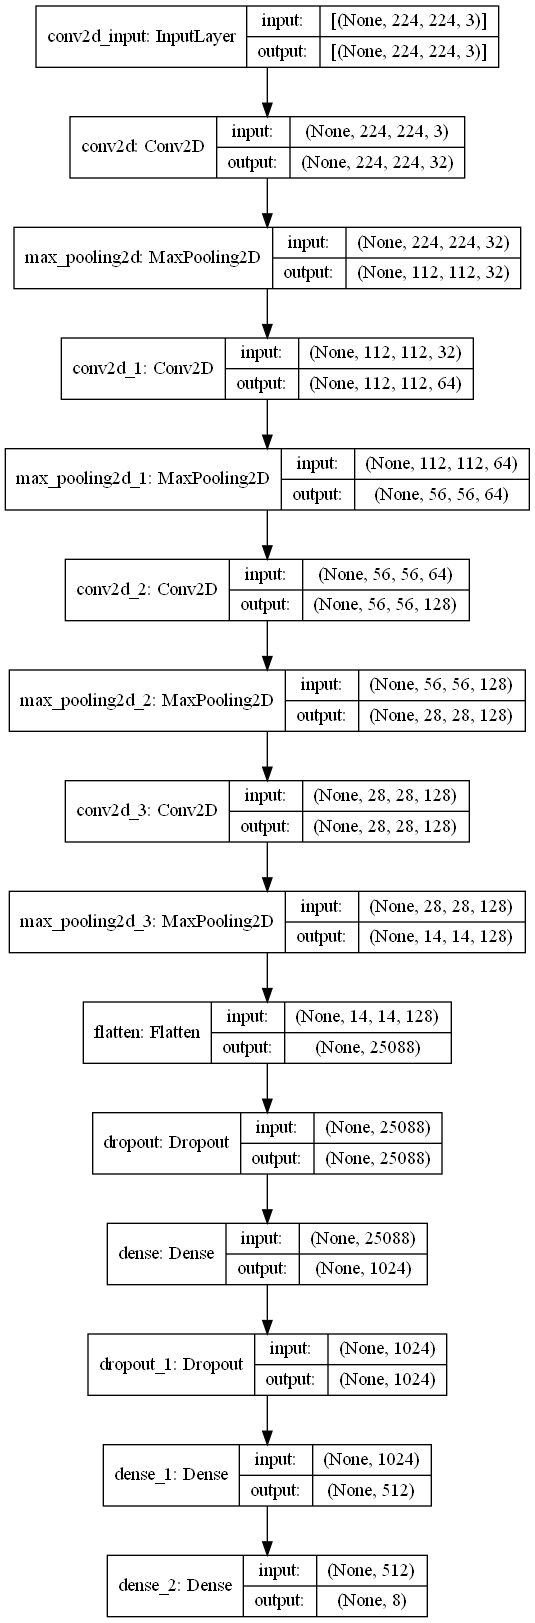

In [57]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

### Set up for using GPU in local device

In [58]:
# Set up for using GPU (don't recommend if your GPU efficiency is lower than CPU)
# Also if you use Google Colab, it's not necessary to use these code

physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    # Set only the first GPU device to be visible
    tf.config.experimental.set_visible_devices(physical_devices[0], 'GPU')
    print(f"Using only GPU device {physical_devices[0].name}\n")
else:
    print("No physical GPU devices found! \n")

# Verify GPU visibility in TensorFlow
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")

Using only GPU device /physical_device:GPU:0

GPU is available


### Data Preparation (I will use from only Flower dataset for test and shuffle it)

In [ ]:
# unzip dataset file
path_to_zip_file = './Dataset/Flowers.zip'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall('./Dataset/')
    zip_ref.close()

path_to_zip_file = './Dataset/FlowersAdded.zip'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall('./Dataset/')
    zip_ref.close()

In [59]:
# get name of flower types
base_dir = './Dataset/Flowers/'
dataset_categories = [f.name for f in os.scandir(base_dir) if f.is_dir()]
print(dataset_categories)

num_classes = len(dataset_categories)
print("Number of flower categories: " + str(num_classes))

['Babi', 'Calimerio', 'Chrysanthemum', 'Hydrangeas', 'Lisianthus', 'Pingpong', 'Rosy', 'Tana']
8


In [60]:
# Set up path of image file
image_path=[]
flower=[]
for sub_folder in dataset_categories:
    dir_link = base_dir + sub_folder + "/"
    for img_path in os.listdir(dir_link):
        image_path.append(dir_link + img_path)
        flower.append(sub_folder)

In [61]:
# Combine Image_Path and Flower_Types to get DataFrame set
Image_path = pd.Series(image_path, name="Image_Path").astype(str)
Flowers=pd.Series(flower, name="Flower_Types")

test_df=pd.concat([Image_path, Flowers], axis=1)

test_df_shuffle = test_df.sample(frac=1).reset_index(drop = True)

test_df_shuffle.head(10)

,Image_Path,Flower_Types
0,./Dataset/Flowers/Lisianthus/lisianthus_116.jpg,Lisianthus
1,./Dataset/Flowers/Babi/babi_368.jpg,Babi
2,./Dataset/Flowers/Pingpong/pingpong_52.jpg,Pingpong
3,./Dataset/Flowers/Babi/babi_430.jpg,Babi
4,./Dataset/Flowers/Chrysanthemum/chrysanthemum_...,Chrysanthemum
5,./Dataset/Flowers/Chrysanthemum/chrysanthemum_...,Chrysanthemum
6,./Dataset/Flowers/Rosy/rosy_95.jpg,Rosy
7,./Dataset/Flowers/Tana/tana_367.jpg,Tana
8,./Dataset/Flowers/Hydrangeas/hydrangeas_108.jpg,Hydrangeas
9,./Dataset/Flowers/Pingpong/pingpong_82.jpg,Pingpong


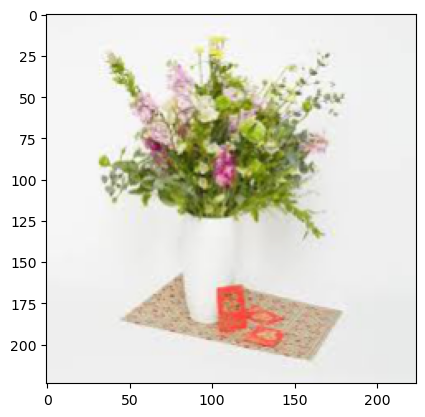

In [62]:
# Test dataset processing
def prepare(filepath):
    img_array = cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB)
    new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
    return np.expand_dims(new_array, axis=0).repeat(BATCH_SIZE, axis=0)

img_test_list = []


# Add image for prediction testing before image processing
for i in range(25):
    first_data = test_df_shuffle.iloc[i]['Image_Path']
    # print(first_data)
    img_arr = prepare(first_data)
    img_test_list.append(img_arr)

# Check image after preprocess by using first image
plt.imshow(img_test_list[0][0])

Single Prediction in first data

In [63]:
# Single predict
idx = 0
first_data = test_df_shuffle.iloc[idx]['Image_Path']
img_arr = prepare(first_data)

prediction = model.predict_classes(img_arr)

print('Predict: ' + dataset_categories[prediction[0]])
print('Actual: ' + test_df_shuffle.iloc[idx]['Flower_Types'])


Predict: Lisianthus
Actual: Lisianthus


Multiple Prediction in dataset (I will test with 25 image data)

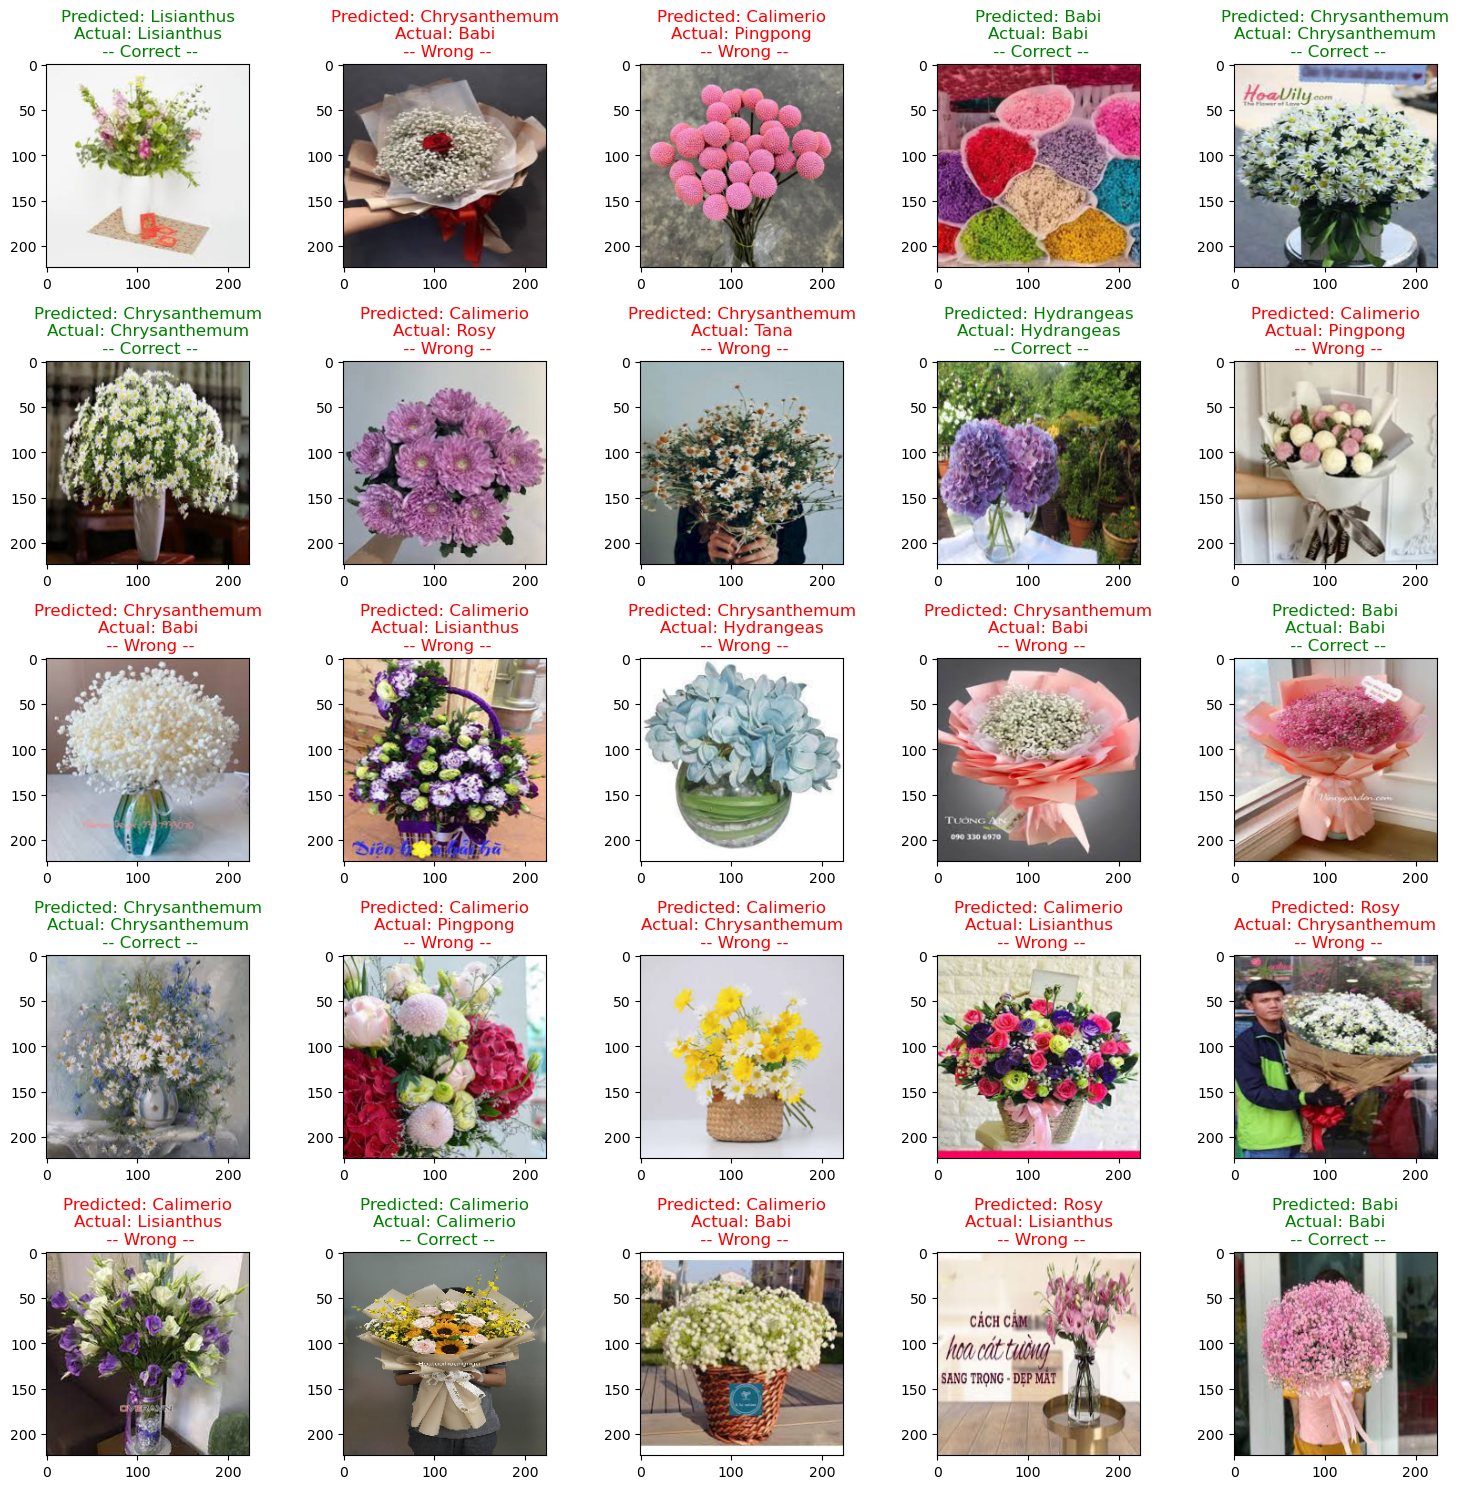

In [64]:
#  Multiple prediction using image table
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

predicted_result = []
for i in range(25):
    prediction = model.predict_classes(img_test_list[i])
    predicted_result.append(dataset_categories[prediction[0]])

for i, ax in enumerate(axes.flat):
    ax.imshow(img_test_list[i][0])

    color = 'white'
    if predicted_result[i] == test_df_shuffle.loc[i, "Flower_Types"]:
        color = 'green'
    else:
        color = 'red'

    def correct_wrong_predicted(item01, item02):

        if item01 == item02:
            return "Correct"
        else:
            return "Wrong"
        
        

    ax.set_title('Predicted: {}'.format(predicted_result[i]) +  
                 '\nActual: ' + test_df_shuffle.loc[i, "Flower_Types"] + 
                 '\n -- {} --'.format(correct_wrong_predicted(predicted_result[i], test_df_shuffle.loc[i, "Flower_Types"])), color=color )
plt.tight_layout()
plt.show()